In [3]:
import keras
import pandas as pd
import numpy as np
from numpy import array

In [4]:
def dnaOneHot(sequence):
    seq_array = array(list(sequence))
    code = {"A": [0], "C": [1], "G": [2], "T": [3], "N": [4],
            "a": [0], "c": [1], "g": [2], "t": [3], "n": [4]}
    onehot_encoded_seq = []
    for char in seq_array:
        onehot_encoded = np.zeros(5)
        onehot_encoded[code[char]] = 1
        onehot_encoded_seq.append(onehot_encoded[0:4])
    return onehot_encoded_seq

In [5]:
def find_c0(dat, aa):
  mat = np.empty((3,3), float)
  k = 2*np.pi/10.4
  n = array([26, 29, 31])
  mat[0:3, 0] = 1
  mat[0:3, 1] = np.sin(n*k)
  mat[0:3, 2] = np.cos(n*k)
  mat[0, 1:3] = mat[0, 1:3]*aa[0]
  mat[1, 1:3] = mat[1, 1:3]*aa[1]
  mat[2, 1:3] = mat[2, 1:3]*aa[2]
  inv_mat = np.linalg.inv(mat)
  c0A1A2 = array(np.matmul(dat[["n=26", "n=29", "n=31"]], np.transpose(inv_mat))).astype(float)
  c0Aphi = c0A1A2
  c0Aphi[:,0] = c0A1A2[:,0]
  c0Aphi[:,1] = np.sqrt(c0A1A2[:,1]**2 + c0A1A2[:,2]**2)
  c0Aphi[:,2] <- np.sign(c0A1A2[:,2]) * np.arccos(c0A1A2[:,1]/c0Aphi[:,1])
  return c0Aphi[:,0]

In [6]:
# INPUTS:

data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/"
# data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/"

training_data_name = "tiling"
# training_data_name = "random"
# training_data_name = "chrv"
# training_data_name = "CN"

# data_name = "cycle1" #txt
# data_name = "cycle3" #txt
data_name = "cycle5" #txt
# data_name = "cycle6" #txt
# data_name = "yeast_chrI_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrIII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrIV_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrV_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrVI_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrVII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrVIII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrIX_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrX_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXI_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXIII_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXIV_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXV_1bpresolution_subsequence50" # csv
# data_name = "yeast_chrXVI_1bpresolution_subsequence50" # csv
# data_name = "tiling_full_reconstructed" # csv
# data_name = "context_library"
# data_name = "expanded_random_library"
# data_name = "expanded_random_library2"

data_file_type = ".txt"
# data_file_type = ".csv"

sequence_column_name = "Sequence"
# sequence_column_name = "sequence"

cn_target = True
# cn_target = False
# use_cycle6_values = False
# use_cycle6_values = True
# c26_target_column_name = "n=26"
# c29_target_column_name = "n=29"
# c31_target_column_name = "n=31"
c26_target_column_name = "C26"
c29_target_column_name = "C29"
c31_target_column_name = "C31"

c0_target=True
# c0_target=False
c0_target_column_name = "C0"
# c0_target_column_name = "C0_orig"

# aa = [1, 1/0.82, 1/0.7]
# aa = [1, 1, 1]

In [7]:
df = pd.read_csv(f"{data_folder_path}{data_name}{data_file_type}")

In [8]:
print(df["n=26"].mean(), df["n=26"].std())
print(df["n=29"].mean(), df["n=29"].std())
print(df["n=31"].mean(), df["n=31"].std())

-0.1702373294847514 0.5761561889426974
-0.1730189136679293 0.5889335849536195
-0.20523567238490675 0.6526103123263609


In [40]:
if cn_target:
    c26_target = df[c26_target_column_name]
    c29_target = df[c29_target_column_name]
    c31_target = df[c31_target_column_name]

    # c26_mean = c26_target.mean()
    # c26_std = c26_target.std()
    # c29_mean = c29_target.mean()
    # c29_std = c29_target.std()
    # c31_mean = c31_target.mean()
    # c31_std = c31_target.std()
# else:
#     if use_cycle6_values: 
#         c26_mean = -0.16768286628076307
#         c26_std = 0.6836696740389017
#         c29_mean = -0.19501344149555846
#         c29_std = 0.7229153575963156
#         c31_mean = -0.18911509983738653
#         c31_std = 0.6997697090882925
#     else:
#         raise NotImplemented("Need to implement a default a mean/stdev")

In [41]:
if c0_target:
    c0_target = df[c0_target_column_name]

In [42]:
X = []
for sequence_nt in df[sequence_column_name]:
    X.append(dnaOneHot(sequence_nt))
X = array(X)
X = X.reshape((X.shape[0],50,4,1))

In [43]:
# X_reverse = np.flip(X, 1)
# X_comp = np.flip(X, 2)
X_rev_comp = np.flip(X,[1,2])

In [44]:
# C26:
c26_predictions = np.zeros([X.shape[0], 10])
# c26_reverse_predictions = np.zeros([X.shape[0], 10])
# c26_comp_predictions = np.zeros([X.shape[0], 10])
c26_rev_comp_predictions = np.zeros([X.shape[0], 10])
for i in range(1,11):
    cur_model = keras.models.load_model(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/benchmarks/ir_lstm_c26_{training_data_name}_{i}.h5")
    cur_model_pred_norm = cur_model.predict(X)
    # cur_model_pred_norm_reverse = cur_model.predict(X_reverse)
    # cur_model_pred_norm_comp = cur_model.predict(X_comp)
    cur_model_pred_norm_rev_comp = cur_model.predict(X_rev_comp)
    # cur_model_pred = cur_model_pred_norm*c26_std + c26_mean
    # c26_predictions[:,i-1] = cur_model_pred.flatten()
    c26_predictions[:,i-1] = cur_model_pred_norm.flatten()
    # c26_reverse_predictions[:,i-1] = cur_model_pred_norm_reverse.flatten()
    # c26_comp_predictions[:,i-1] = cur_model_pred_norm_comp.flatten()
    c26_rev_comp_predictions[:,i-1] = cur_model_pred_norm_rev_comp.flatten()

19486/19486 [==============================] - 41s 2ms/step


In [45]:
c26_avg_predictions = np.mean(c26_predictions, axis=1)
# c26_avg_reverse_predictions = np.mean(c26_reverse_predictions, axis=1)
# c26_avg_comp_predictions = np.mean(c26_comp_predictions, axis=1)
c26_avg_rev_comp_predictions = np.mean(c26_rev_comp_predictions, axis=1)

In [46]:
# C29:
c29_predictions = np.zeros([X.shape[0], 10])
# c29_reverse_predictions = np.zeros([X.shape[0], 10])
# c29_comp_predictions = np.zeros([X.shape[0], 10])
c29_rev_comp_predictions = np.zeros([X.shape[0], 10])
for i in range(1,11):
    cur_model = keras.models.load_model(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/benchmarks/ir_lstm_c29_{training_data_name}_{i}.h5")
    cur_model_pred_norm = cur_model.predict(X)
    # cur_model_pred_norm_reverse = cur_model.predict(X_reverse)
    # cur_model_pred_norm_comp = cur_model.predict(X_comp)
    cur_model_pred_norm_rev_comp = cur_model.predict(X_rev_comp)
    # cur_model_pred = cur_model_pred_norm*c29_std + c29_mean
    # c29_predictions[:,i-1] = cur_model_pred.flatten()
    c29_predictions[:,i-1] = cur_model_pred_norm.flatten()
    # c29_reverse_predictions[:,i-1] = cur_model_pred_norm_reverse.flatten()
    # c29_comp_predictions[:,i-1] = cur_model_pred_norm_comp.flatten()
    c29_rev_comp_predictions[:,i-1] = cur_model_pred_norm_rev_comp.flatten()


19486/19486 [==============================] - 80s 4ms/step


In [47]:
c29_avg_predictions = np.mean(c29_predictions, axis=1)
# c29_avg_reverse_predictions = np.mean(c29_reverse_predictions, axis=1)
# c29_avg_comp_predictions = np.mean(c29_comp_predictions, axis=1)
c29_avg_rev_comp_predictions = np.mean(c29_rev_comp_predictions, axis=1)

In [48]:
# C31:
c31_predictions = np.zeros([X.shape[0], 10])
# c31_reverse_predictions = np.zeros([X.shape[0], 10])
# c31_comp_predictions = np.zeros([X.shape[0], 10])
c31_rev_comp_predictions = np.zeros([X.shape[0], 10])
for i in range(1,11):
    cur_model = keras.models.load_model(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/benchmarks/ir_lstm_c31_{training_data_name}_{i}.h5")
    cur_model_pred_norm = cur_model.predict(X)
    # cur_model_pred_norm_reverse = cur_model.predict(X_reverse)
    # cur_model_pred_norm_comp = cur_model.predict(X_comp)
    cur_model_pred_norm_rev_comp = cur_model.predict(X_rev_comp)    # cur_model_pred = cur_model_pred_norm*c31_std + c31_mean
    # c31_predictions[:,i-1] = cur_model_pred.flatten()
    c31_predictions[:,i-1] = cur_model_pred_norm.flatten()
    # c31_reverse_predictions[:,i-1] = cur_model_pred_norm_reverse.flatten()
    # c31_comp_predictions[:,i-1] = cur_model_pred_norm_comp.flatten()
    c31_rev_comp_predictions[:,i-1] = cur_model_pred_norm_rev_comp.flatten()

19486/19486 [==============================] - 51s 3ms/step


In [49]:
c31_avg_predictions = np.mean(c31_predictions, axis=1)
# c31_avg_reverse_predictions = np.mean(c31_reverse_predictions, axis=1)
# c31_avg_comp_predictions = np.mean(c31_comp_predictions, axis=1)
c31_avg_rev_comp_predictions = np.mean(c31_rev_comp_predictions, axis=1)

In [50]:
# Calculate post-prediction C0:
cn_avg_pred_df = pd.DataFrame(columns=['n=26', 'n=29', 'n=31'])
cn_avg_pred_df["n=26"] = c26_avg_predictions
cn_avg_pred_df["n=29"] = c29_avg_predictions
cn_avg_pred_df["n=31"] = c31_avg_predictions

# cn_avg_pred_df["n=26_reverse"] = c26_avg_reverse_predictions
# cn_avg_pred_df["n=29_reverse"] = c29_avg_reverse_predictions
# cn_avg_pred_df["n=31_reverse"] = c31_avg_reverse_predictions

# cn_avg_pred_df["n=26_comp"] = c26_avg_comp_predictions
# cn_avg_pred_df["n=29_comp"] = c29_avg_comp_predictions
# cn_avg_pred_df["n=31_comp"] = c31_avg_comp_predictions

cn_avg_pred_df["n=26_rev_comp"] = c26_avg_rev_comp_predictions
cn_avg_pred_df["n=29_rev_comp"] = c29_avg_rev_comp_predictions
cn_avg_pred_df["n=31_rev_comp"] = c31_avg_rev_comp_predictions

# post_prediction_c0 = find_c0(cn_avg_pred_df, aa)
# cn_avg_pred_df["C0"] = post_prediction_c0

if cn_target:
    corr_df = pd.concat([cn_avg_pred_df, c26_target, c29_target, c31_target], axis=1)
    corr_df_corr = corr_df.corr()
    print(f"C26 prediction correlation on {data_name}: {corr_df_corr.iloc[0,6]}")
    print(f"C29 prediction correlation on {data_name}: {corr_df_corr.iloc[1,7]}")
    print(f"C31 prediction correlation on {data_name}: {corr_df_corr.iloc[2,8]}")

C26 prediction correlation on expanded_random_library2: 0.9396849015525113
C29 prediction correlation on expanded_random_library2: 0.9135841338772789
C31 prediction correlation on expanded_random_library2: 0.9560242898540687


In [51]:
# if cn_target:
#     print(f"C26 prediction correlation on {data_name}: {np.corrcoef(c26_avg_predictions, c26_target)[0,1]}")
#     print(f"C29 prediction correlation on {data_name}: {np.corrcoef(c29_avg_predictions, c29_target)[0,1]}")
#     print(f"C31 prediction correlation on {data_name}: {np.corrcoef(c31_avg_predictions, c31_target)[0,1]}")

In [56]:
# if type(c0_target) is not bool:
#     corr_df = pd.concat([cn_avg_pred_df, c0_target], axis=1)
#     print(f"Post-prediction C0 correlation on {data_name}: {corr_df.corr().iloc[3,4]}")

In [53]:
cn_avg_pred_df.to_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv", index=False)

In [54]:
cn_avg_pred_df

,n=26,n=29,n=31,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp
0,0.058548,2.015778,1.993518,1.346224,-0.040121,1.507668
1,-0.506311,1.199270,1.619459,0.022349,0.468056,1.421449
2,0.173427,0.531992,1.531901,-0.303240,1.227293,1.664994
3,0.476235,-0.577791,0.895687,-0.291293,1.386426,1.663041
4,1.045103,-1.051831,0.357828,0.438993,1.606905,1.629065
...,...,...,...,...,...,...
623546,2.576716,1.320394,0.295092,2.341935,2.223481,1.615885
623547,2.495417,1.831674,0.470221,2.459594,1.990557,0.842493
623548,2.008873,1.925845,1.057911,2.298404,1.436253,-0.093935
623549,1.591547,1.899331,1.390247,2.046281,0.593321,-0.464840


In [69]:
max_seq_avg_pred_df = cn_avg_pred_df.loc[:(cn_avg_pred_df.shape[0]//2 - 1)]
min_seq_avg_pred_df = cn_avg_pred_df.loc[(cn_avg_pred_df.shape[0]//2):]

In [70]:
max_seq_avg_pred_df

,n=26,n=29,n=31,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp
0,2.611345,1.188435,0.589168,1.664323,0.662960,-0.022831
1,2.776073,1.373528,0.781953,1.837797,0.736933,-0.010555
2,2.854782,1.480949,0.805799,1.946132,0.790499,-0.006188
3,2.643303,1.206905,0.618811,1.700655,0.672209,-0.040143
4,2.982534,1.757252,0.986926,2.128746,0.856770,0.002203
...,...,...,...,...,...,...
1048571,2.921058,1.862265,1.172172,2.228509,0.561908,-0.473925
1048572,2.739722,1.454888,0.884111,2.011353,0.431201,-0.713109
1048573,2.650013,1.253280,0.797652,1.863401,0.344341,-0.754883
1048574,2.785521,1.475270,0.893907,2.053345,0.488659,-0.676363


In [71]:
min_seq_avg_pred_df

,n=26,n=29,n=31,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp
1048576,-0.308736,0.947095,0.010794,0.754307,-0.981051,-2.173604
1048577,0.013869,1.222166,0.399186,1.068243,-0.735342,-1.892817
1048578,0.179052,1.323845,0.433502,1.231504,-0.633070,-1.794936
1048579,-0.278753,0.970707,0.075559,0.813958,-0.943437,-2.166639
1048580,0.559881,1.691060,0.790432,1.650464,-0.358007,-1.279768
...,...,...,...,...,...,...
2097147,0.167523,1.190176,0.391760,1.180065,-0.651815,-1.551800
2097148,-0.242236,0.697322,-0.052399,0.726101,-0.988925,-2.121238
2097149,-0.432895,0.511617,-0.129564,0.513316,-1.115050,-2.233403
2097150,-0.166845,0.693849,-0.032848,0.760511,-0.913581,-2.076114


In [73]:
max_seq_avg_pred_df.max(axis=0)

n=26             3.106657
n=29             2.271132
n=31             1.686886
n=26_rev_comp    2.429492
n=29_rev_comp    0.921865
n=31_rev_comp    0.019624
dtype: float64

In [74]:
max_seq_avg_pred_df.min(axis=0)

n=26             1.336324
n=29            -0.979522
n=31            -0.916799
n=26_rev_comp   -0.003756
n=29_rev_comp   -1.368862
n=31_rev_comp   -1.786991
dtype: float64

In [75]:
import matplotlib.pyplot as plt

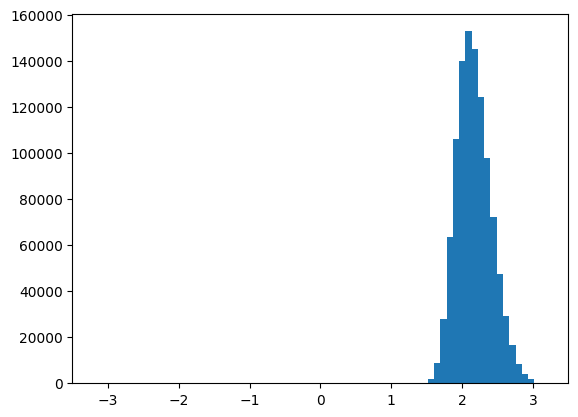

In [82]:
plt.hist(max_seq_avg_pred_df["n=26"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

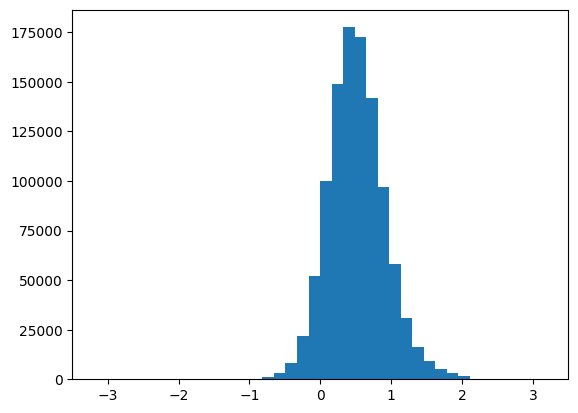

In [83]:
plt.hist(max_seq_avg_pred_df["n=29"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

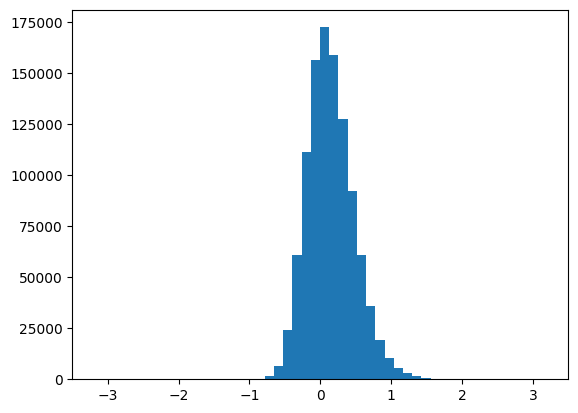

In [84]:
plt.hist(max_seq_avg_pred_df["n=31"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

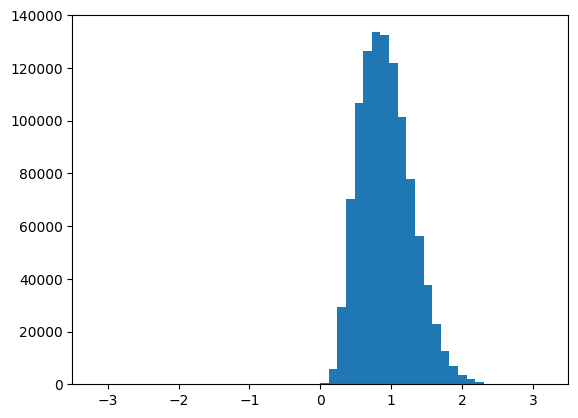

In [85]:
plt.hist(max_seq_avg_pred_df["n=26_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

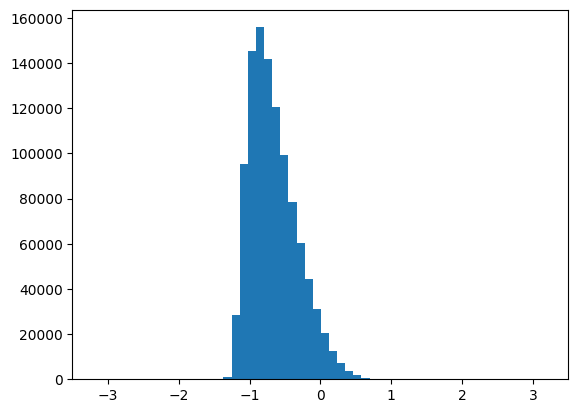

In [86]:
plt.hist(max_seq_avg_pred_df["n=29_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

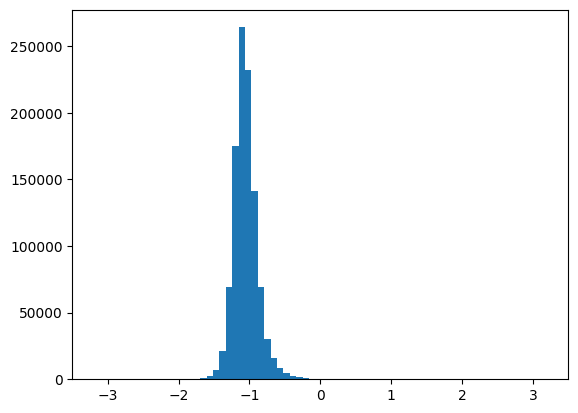

In [87]:
plt.hist(max_seq_avg_pred_df["n=31_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

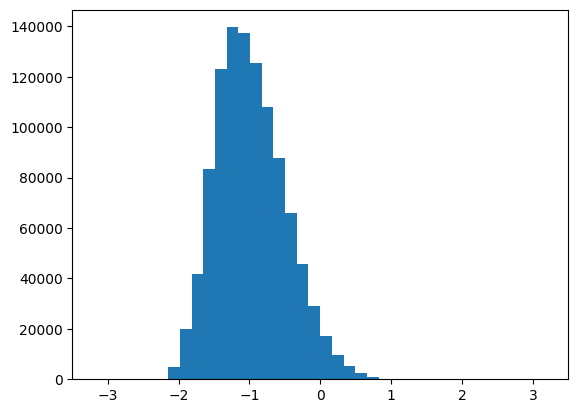

In [88]:
plt.hist(min_seq_avg_pred_df["n=26"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

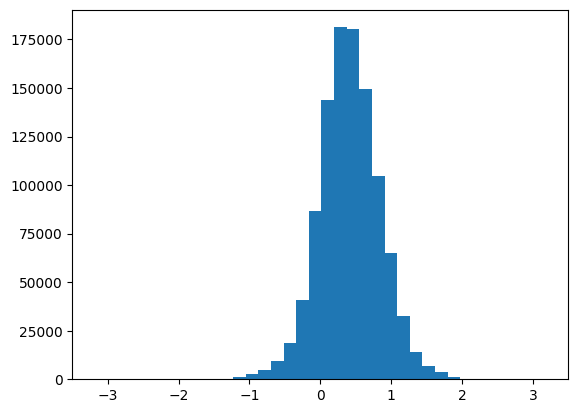

In [89]:
plt.hist(min_seq_avg_pred_df["n=29"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

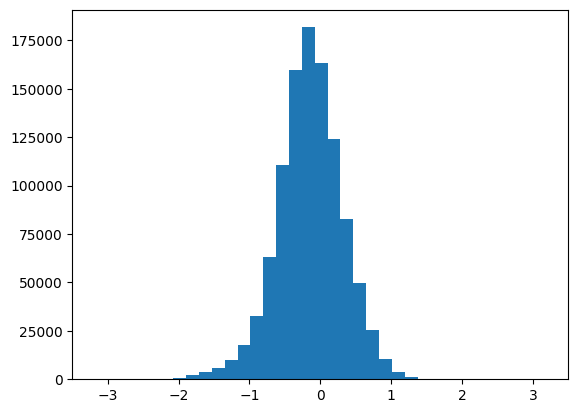

In [90]:
plt.hist(min_seq_avg_pred_df["n=31"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

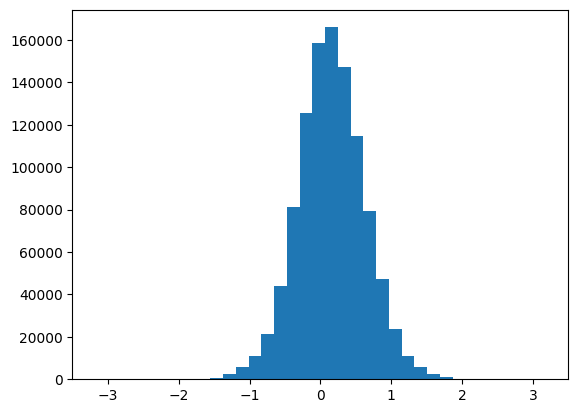

In [91]:
plt.hist(min_seq_avg_pred_df["n=26_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

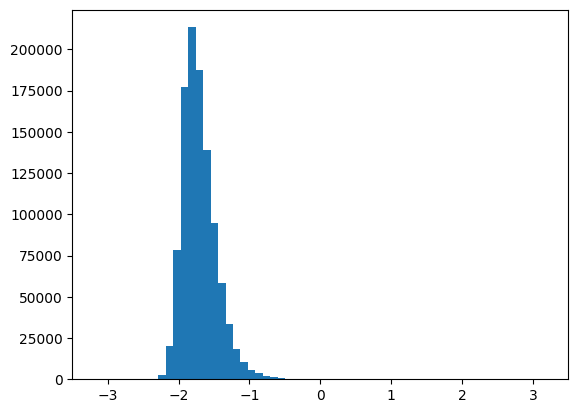

In [92]:
plt.hist(min_seq_avg_pred_df["n=29_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()

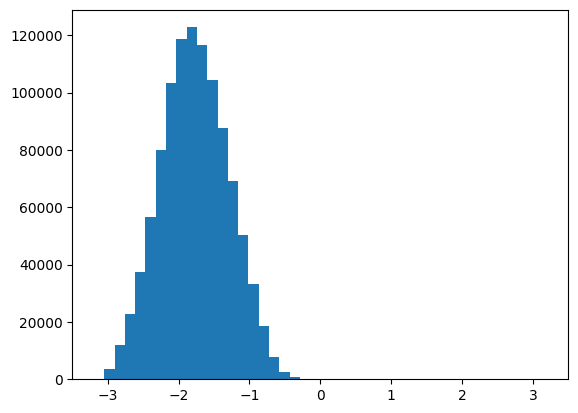

In [93]:
plt.hist(min_seq_avg_pred_df["n=31_rev_comp"], bins=20)
plt.xlim([-3.5,3.5])
plt.show()